**`Description`**

- This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corportion (Apple Inc.) using the past 60 days stock price.

In [0]:
## Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
## Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2019-12-31')

## show data
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,99.945885
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.130241
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.139420
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.501518
2015-01-08,112.150002,108.699997,109.230003,111.889999,59364500.0,102.286186
2015-01-09,113.250000,110.209999,112.669998,112.010002,53699500.0,102.395844
2015-01-12,112.629997,108.800003,112.599998,109.250000,49650800.0,99.872757
2015-01-13,112.800003,108.910004,111.430000,110.220001,67091900.0,100.759514
2015-01-14,110.489998,108.500000,109.040001,109.800003,48956600.0,100.375572


In [0]:
## check for "Date" column
# type(df["Date"][0])

In [0]:
## Get the number of rows and columns in the dtaa set
df.shape

(1258, 6)

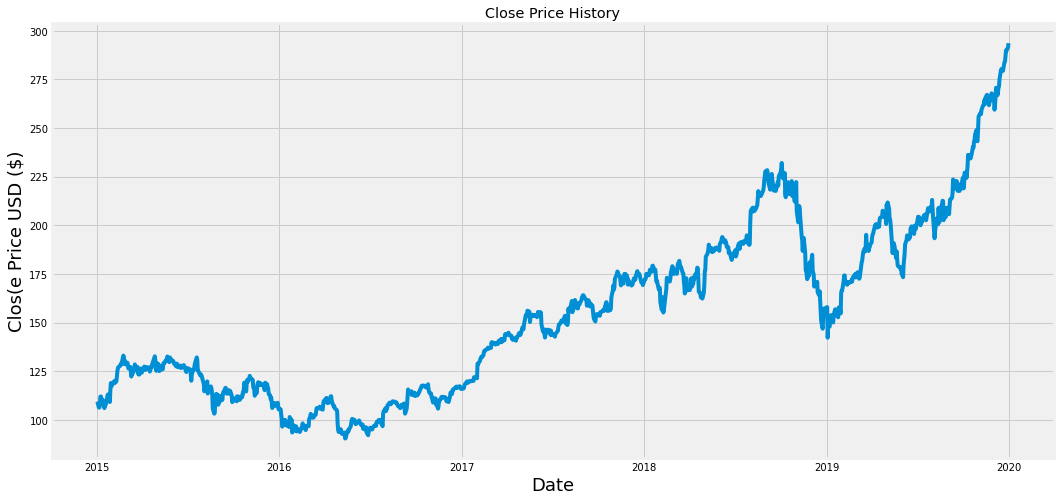

In [0]:
## Visualize closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df["Close"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Clos(e Price USD ($)', fontsize=18)
plt.show()

In [0]:
## Create a new dataframe with only the "Close" column
data = df.filter(["Close"])
display(data)


## Convert the dataframe to a numpy array
dataset = data.values
print("\ndataframe to a numpy array:\n", dataset)


## Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
print("\n No. of training rows: ",training_data_len)

,Close
Date,
2015-01-02,109.330002
2015-01-05,106.250000
2015-01-06,106.260002
2015-01-07,107.750000
2015-01-08,111.889999
...,...
2019-12-24,284.269989
2019-12-26,289.910004
2019-12-27,289.799988



dataframe to a numpy array:
 [[109.33000183]
 [106.25      ]
 [106.26000214]
 ...
 [289.79998779]
 [291.51998901]
 [293.6499939 ]]

 No. of training rows:  1007


In [0]:
## Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.09340419]
 [0.0782549 ]
 [0.0783041 ]
 ...
 [0.98106337]
 [0.98952336]
 [1.        ]]


In [0]:
## Create the training dataset
# Create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

## Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # first 60 rows 0 to 59
    y_train.append(train_data[i, 0]) # 61st value i.e. 60
    if i<=60:
        print(x_train)
        print(y_train)
        print()
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.09340419, 0.0782549 , 0.0783041 , 0.0856328 , 0.10599579,
       0.10658603, 0.09301069, 0.09778174, 0.09571594, 0.0810585 ,
       0.07697605, 0.09040384, 0.09448629, 0.10850428, 0.11135708,
       0.11194728, 0.09246964, 0.12281738, 0.14047516, 0.13191681,
       0.13914712, 0.13924551, 0.14372142, 0.14559051, 0.14062272,
       0.14450841, 0.15582116, 0.16988835, 0.17765975, 0.18070929,
       0.18439824, 0.18877579, 0.18744775, 0.19261229, 0.20982738,
       0.20574493, 0.18912005, 0.19713739, 0.18749698, 0.19059564,
       0.19192369, 0.1878904 , 0.17741384, 0.17834835, 0.18100439,
       0.1680685 , 0.15690326, 0.16777336, 0.16354336, 0.17023265,
       0.18051254, 0.18754614, 0.18277509, 0.17490534, 0.1813487 ,
       0.17879104, 0.16251046, 0.16674046, 0.16187105, 0.17721709])]
[0.16767500062293023]

[array([0.09340419, 0.0782549 , 0.0783041 , 0.0856328 , 0.10599579,
       0.10658603, 0.09301069, 0.09778174, 0.09571594, 0.0810585 ,
       0.07697605, 0.09040384, 0.09

In [0]:
## Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)
print(x_train.shape[0], y_train.shape[0])

(947, 60) (947,)
947 947


In [0]:
## Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# here, 947 is no. of rows, 60 is no. of timestamp, 1 is no. of feature i.e. just the close column
print(x_train.shape)

(947, 60, 1)


In [0]:
## Build the LSTM model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1))) # 50 is no. of neurons
model.add(LSTM(50, return_sequences=False)) ## False because we are not going to use LSTM model later

model.add(Dense(25))
model.add(Dense(1))

In [0]:
## Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
## Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)
# batch_size is the total number of training example present in the single batch
# epochs is the number of iteration when the entire dataset is passed forward and backward through a neural network

Epoch 1/2
947/947 [==============================] - 35s 37ms/step - loss: 0.0015
Epoch 2/2
947/947 [==============================] - 34s 36ms/step - loss: 7.4456e-04


In [0]:
## Create a testing dataset
# Create a new array containing scaled values from index 1007-60 to 1258
test_data = scaled_data[training_data_len - 60:, :]

# Create teh datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] ## Actual 61st value

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) # first 60 rows 0 to 59
    

In [0]:
## Convert test data to a numpy array
x_test = np.array(x_test)
print(x_test.shape)

## Reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # 1 is just close feature


(251, 60)


In [0]:
## Get the model predicted price values
predictions = model.predict(x_test) 

## unscaling the values to see the exact closing price
predictions = scaler.inverse_transform(predictions)

In [0]:
## Evaluate the model
## Get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

4.350981146215918

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


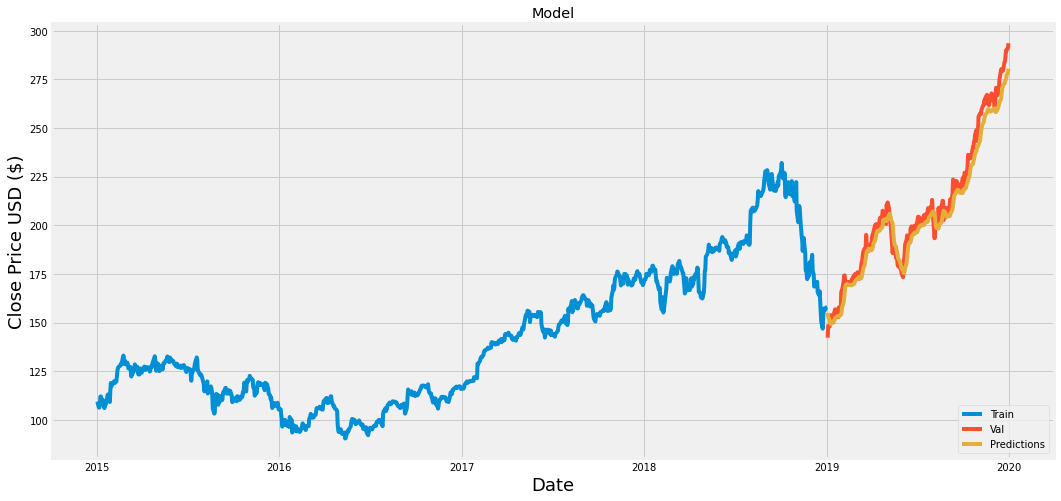

In [0]:
## Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the model
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [0]:
## Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-01-03,142.190002,154.938232
2019-01-04,148.259995,152.971176
2019-01-07,147.929993,151.247650
2019-01-08,150.750000,149.813278
2019-01-09,153.309998,149.189087
...,...,...
2019-12-24,284.269989,273.934875
2019-12-26,289.910004,275.044952
2019-12-27,289.799988,276.970245


In [0]:
## Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2019-12-31')

## Create a new dataframe
new_df =  apple_quote.filter(['Close'])

## Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

## scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# creat an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

## Convert the X_test data set to an numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

## undo scaling 
pre_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[0.94384134]]
